This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [3]:
train_images_with_noise_channels

array([[0.        , 0.        , 0.        , ..., 0.58546278, 0.26952736,
        0.44829916],
       [0.        , 0.        , 0.        , ..., 0.81327424, 0.54468399,
        0.61553821],
       [0.        , 0.        , 0.        , ..., 0.16666444, 0.16489991,
        0.49421795],
       ...,
       [0.        , 0.        , 0.        , ..., 0.69676503, 0.74782574,
        0.97172459],
       [0.        , 0.        , 0.        , ..., 0.4254507 , 0.45584996,
        0.23673781],
       [0.        , 0.        , 0.        , ..., 0.84087218, 0.90870294,
        0.73269994]])

In [4]:
train_images_with_zeros_channels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2022-10-17 10:15:04.955982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.6247 - accuracy: 0.8115 - val_loss: 0.2908 - val_accuracy: 0.9093
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2418 - accuracy: 0.9255 - val_loss: 0.2213 - val_accuracy: 0.9294
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1551 - accuracy: 0.9514 - val_loss: 0.1417 - val_accuracy: 0.9580
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1124 - accuracy: 0.9642 - val_loss: 0.1305 - val_accuracy: 0.9623
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0811 - accuracy: 0.9740 - val_loss: 0.1238 - val_accuracy: 0.9638
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0608 - accuracy: 0.9798 - val_loss: 0.1359 - val_accuracy: 0.9629
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0467 - accuracy: 0.9845 - val_loss: 0.1227 - val_accuracy: 0.9673
Epo

**Plotting a validation accuracy comparison**

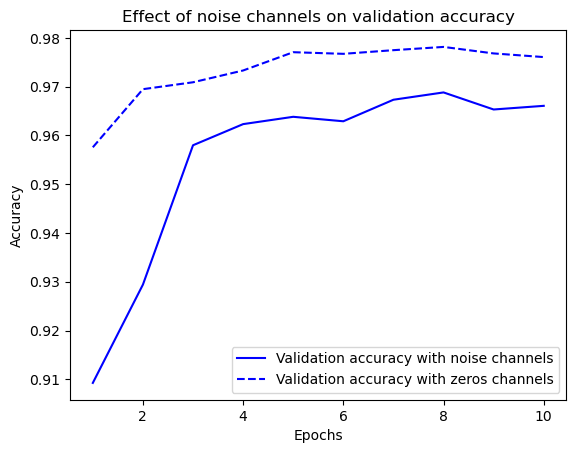

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3181 - accuracy: 0.1057 - val_loss: 2.3070 - val_accuracy: 0.1034
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2989 - accuracy: 0.1187 - val_loss: 2.3118 - val_accuracy: 0.1037
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2894 - accuracy: 0.1298 - val_loss: 2.3191 - val_accuracy: 0.1008
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2756 - accuracy: 0.1420 - val_loss: 2.3294 - val_accuracy: 0.1037
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2569 - accuracy: 0.1562 - val_loss: 2.3358 - val_accuracy: 0.1052
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2359 - accuracy: 0.1733 - val_loss: 2.3499 - val_accuracy: 0.1010
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2107 - accuracy: 0.1862 - val_loss: 2.3716 - val_accuracy: 0.1025

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 781.6339 - accuracy: 0.3941 - val_loss: 2.6554 - val_accuracy: 0.2524
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 4.2868 - accuracy: 0.3008 - val_loss: 2.0901 - val_accuracy: 0.3268
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 3.0557 - accuracy: 0.3063 - val_loss: 2.3585 - val_accuracy: 0.2938
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7891 - accuracy: 0.3009 - val_loss: 2.1982 - val_accuracy: 0.2747
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7489 - accuracy: 0.2845 - val_loss: 2.8174 - val_accuracy: 0.3113
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6486 - accuracy: 0.2959 - val_loss: 3.8947 - val_accuracy: 0.3199
Epoch 7/10
375/375 [==============================] - 2s 7ms/step - loss: 2.8093 - accuracy: 0.3119 - val_loss: 2.0980 - val_accuracy: 0.3205
Epoc

**The same model with a more appropriate learning rate**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3654 - accuracy: 0.9130 - val_loss: 0.1361 - val_accuracy: 0.9608
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1427 - accuracy: 0.9639 - val_loss: 0.1620 - val_accuracy: 0.9628
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1176 - accuracy: 0.9724 - val_loss: 0.1688 - val_accuracy: 0.9701
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1008 - accuracy: 0.9782 - val_loss: 0.1736 - val_accuracy: 0.9727
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0898 - accuracy: 0.9817 - val_loss: 0.1970 - val_accuracy: 0.9711
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0801 - accuracy: 0.9838 - val_loss: 0.2926 - val_accuracy: 0.9576
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0743 - accuracy: 0.9863 - val_loss: 0.2381 - val_accuracy: 0.9741
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6718 - accuracy: 0.8353 - val_loss: 0.3584 - val_accuracy: 0.9013
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.9039 - val_loss: 0.3058 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3150 - accuracy: 0.9121 - val_loss: 0.2890 - val_accuracy: 0.9195
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.9167 - val_loss: 0.2803 - val_accuracy: 0.9225
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.9197 - val_loss: 0.2761 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2829 - accuracy: 0.9211 - val_loss: 0.2708 - val_accuracy: 0.9256
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9229 - val_loss: 0.2679 - val_accuracy: 0.9256
Epoch 

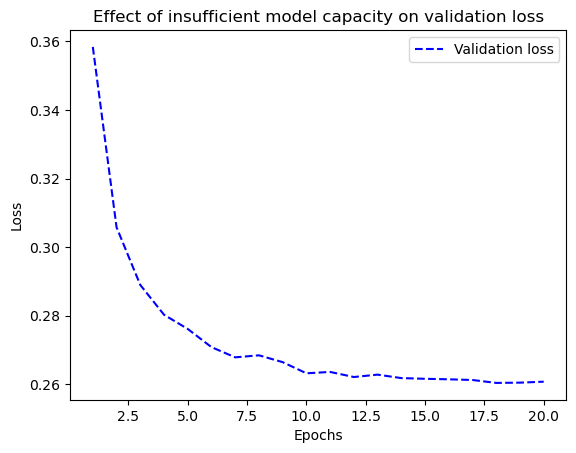

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3498 - accuracy: 0.9015 - val_loss: 0.1960 - val_accuracy: 0.9447
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1561 - accuracy: 0.9542 - val_loss: 0.1535 - val_accuracy: 0.9556
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1106 - accuracy: 0.9666 - val_loss: 0.1116 - val_accuracy: 0.9668
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9747 - val_loss: 0.1079 - val_accuracy: 0.9693
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0986 - val_accuracy: 0.9726
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0971 - val_accuracy: 0.9732
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0978 - val_accuracy: 0.9747
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 60s 3us/step
Epoch 1/20
30/30 [==============================] - 4s 110ms/step - loss: 0.5109 - accuracy: 0.7913 - val_loss: 0.3968 - val_accuracy: 0.8590
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3088 - accuracy: 0.8996 - val_loss: 0.3494 - val_accuracy: 0.8565
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2261 - accuracy: 0.9276 - val_loss: 0.2777 - val_accuracy: 0.8932
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1776 - accuracy: 0.9430 - val_loss: 0.2754 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1465 - accuracy: 0.9525 - val_loss: 0.2890 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1215 - accuracy: 0.9617 - val_loss: 0.3312 - val_accuracy: 0.8735
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1014 - accur

**Version of the model with lower capacity**

In [13]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 91ms/step - loss: 0.5967 - accuracy: 0.7472 - val_loss: 0.5103 - val_accuracy: 0.8547
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4435 - accuracy: 0.8807 - val_loss: 0.4156 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3524 - accuracy: 0.9063 - val_loss: 0.3584 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2885 - accuracy: 0.9207 - val_loss: 0.3245 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2433 - accuracy: 0.9315 - val_loss: 0.2951 - val_accuracy: 0.8915
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2093 - accuracy: 0.9381 - val_loss: 0.2827 - val_accuracy: 0.8914
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1828 - accuracy: 0.9457 - val_loss: 0.2762 - val_accuracy: 0.8932
Epoch 8/20
30

**Version of the model with higher capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 8s 214ms/step - loss: 0.5565 - accuracy: 0.7379 - val_loss: 0.3006 - val_accuracy: 0.8846
Epoch 2/20
30/30 [==============================] - 5s 165ms/step - loss: 0.2517 - accuracy: 0.9034 - val_loss: 0.3044 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 4s 134ms/step - loss: 0.1344 - accuracy: 0.9491 - val_loss: 0.6663 - val_accuracy: 0.7887
Epoch 4/20
30/30 [==============================] - 4s 134ms/step - loss: 0.1240 - accuracy: 0.9537 - val_loss: 0.2892 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 4s 135ms/step - loss: 0.0189 - accuracy: 0.9961 - val_loss: 0.7694 - val_accuracy: 0.8142
Epoch 6/20
30/30 [==============================] - 4s 145ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.4832 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 5s 148ms/step - loss: 9.6336e-04 - accuracy: 0.9999 - val_loss: 0.6226 - val_accuracy: 0.8872
Ep

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 118ms/step - loss: 0.5885 - accuracy: 0.7896 - val_loss: 0.4667 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4046 - accuracy: 0.8967 - val_loss: 0.3943 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3449 - accuracy: 0.9093 - val_loss: 0.3712 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3084 - accuracy: 0.9230 - val_loss: 0.3699 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2907 - accuracy: 0.9283 - val_loss: 0.3680 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2743 - accuracy: 0.9332 - val_loss: 0.3781 - val_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2654 - accuracy: 0.9364 - val_loss: 0.3620 - val_accuracy: 0.8852
Epoch 8/20
3

**Different weight regularizers available in Keras**

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 105ms/step - loss: 0.6184 - accuracy: 0.6482 - val_loss: 0.4845 - val_accuracy: 0.8521
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.4880 - accuracy: 0.7722 - val_loss: 0.3885 - val_accuracy: 0.8718
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4168 - accuracy: 0.8211 - val_loss: 0.3291 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3600 - accuracy: 0.8501 - val_loss: 0.2966 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3108 - accuracy: 0.8793 - val_loss: 0.2825 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2742 - accuracy: 0.8969 - val_loss: 0.2796 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2467 - accuracy: 0.9123 - val_loss: 0.2757 - val_accuracy: 0.8929
Epoch 8/20
3

## Summary